[[-6.62487509e-04]
 [-9.36728168e-01]]
[[ 0.67331937]
 [-2.75248052]]


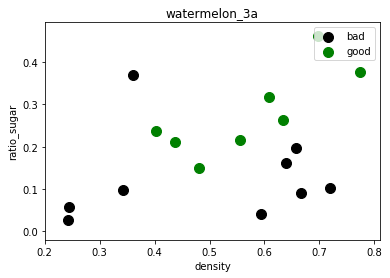

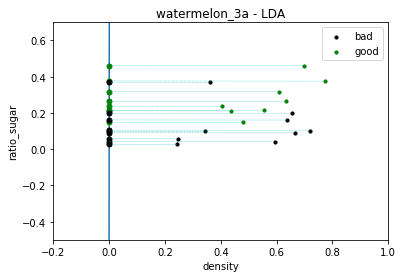

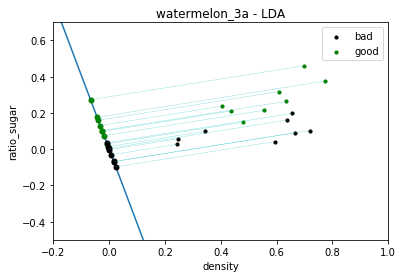

In [5]:
# -*- coding: utf-8 -*

'''''
Create on 2017/3/21
@author PY131
'''''
from _operator import inv

'''
data importion and pre-analysis
'''
import numpy as np  # for matrix calculation
import matplotlib.pyplot as plt 

# load the CSV file as a numpy matrix
data_file = open('watermelon_3a.csv')
dataset = np.loadtxt(data_file, delimiter=",")

# separate the data from the target attributes
X = dataset[:,1:3]
y = dataset[:,3]

# draw scatter diagram to show the raw data
f1 = plt.figure(1)       
plt.title('watermelon_3a')  
plt.xlabel('density')  
plt.ylabel('ratio_sugar')  
plt.scatter(X[y == 0,0], X[y == 0,1], marker = 'o', color = 'k', s=100, label = 'bad')
plt.scatter(X[y == 1,0], X[y == 1,1], marker = 'o', color = 'g', s=100, label = 'good')
plt.legend(loc = 'upper right')  
# plt.show()

'''
LDA via sklearn
'''
'''
from sklearn import model_selection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
import matplotlib.pyplot as plt
# generalization of train and test set
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.5, random_state=0)
# model fitting
lda_model = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None).fit(X_train, y_train)
# model validation
y_pred = lda_model.predict(X_test)
# summarize the fit of the model
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))
# draw the classfier decision boundary
f2 = plt.figure(2) 
h = 0.001
# x0_min, x0_max = X[:, 0].min()-0.1, X[:, 0].max()+0.1
# x1_min, x1_max = X[:, 1].min()-0.1, X[:, 1].max()+0.1
x0, x1 = np.meshgrid(np.arange(-1, 1, h),
                     np.arange(-1, 1, h))
# x0, x1 = np.meshgrid(np.arange(x0_min, x0_max, h),
#                      np.arange(x1_min, x1_max, h))
z = lda_model.predict(np.c_[x0.ravel(), x1.ravel()]) 
# Put the result into a color plot
z = z.reshape(x0.shape)
plt.contourf(x0, x1, z)
# Plot also the training pointsplt.title('watermelon_3a')  
plt.title('watermelon_3a')  
plt.xlabel('density')  
plt.ylabel('ratio_sugar')  
plt.scatter(X[y == 0,0], X[y == 0,1], marker = 'o', color = 'k', s=100, label = 'bad')
plt.scatter(X[y == 1,0], X[y == 1,1], marker = 'o', color = 'g', s=100, label = 'good')
# plt.show()
'''

'''
implementation of LDA based on self-coding
'''

# computing the d-dimensional mean vectors
# import numpy as np
# 1-st. get the mean vector of each class
# u = []  
# for i in range(2): # two class
#     u.append(np.mean(X[y==i], axis=0))  # column mean
# 
# # 2-nd. computing the within-class scatter matrix, refer on book (3.33)
# m,n = np.shape(X)
# Sw = np.zeros((n,n))
# for i in range(m):
#     x_tmp = np.mat(X[i]).T
#     if   y[i] == 0: u_tmp = np.mat(u[0]).T
#     elif y[i] == 1: u_tmp = np.mat(u[1]).T
#     Sw += (x_tmp - u_tmp) * (x_tmp - u_tmp).T
# print(Sw)
        

# 1-st. get the mean vector of each class

u = []  
for i in range(2): # two class
    u.append(np.mean(X[y==i], axis=0))  # column mean

# 2-nd. computing the within-class scatter matrix, refer on book (3.33)
m,n = np.shape(X)
Sw = np.zeros((n,n))
for i in range(m):
    x_tmp = X[i].reshape(n,1)  # row -> cloumn vector
    if y[i] == 0: u_tmp = u[0].reshape(n,1)
    if y[i] == 1: u_tmp = u[1].reshape(n,1)
    Sw += np.dot( x_tmp - u_tmp, (x_tmp - u_tmp).T )

Sw = np.mat(Sw)
U, sigma, V= np.linalg.svd(Sw) 

Sw_inv = V.T * np.linalg.inv(np.diag(sigma)) * U.T
# 3-th. computing the parameter w, refer on book (3.39)
w = np.dot( Sw_inv, (u[0] - u[1]).reshape(n,1) )  # here we use a**-1 to get the inverse of a ndarray

print(w)

# 4-th draw the LDA line in scatter figure

# f2 = plt.figure(2)
f3 = plt.figure(3)
plt.xlim( -0.2, 1 )
plt.ylim( -0.5, 0.7 )

p0_x0 = -X[:, 0].max()
p0_x1 = ( w[1,0] / w[0,0] ) * p0_x0
p1_x0 = X[:, 0].max()
p1_x1 = ( w[1,0] / w[0,0] ) * p1_x0

plt.title('watermelon_3a - LDA')  
plt.xlabel('density')  
plt.ylabel('ratio_sugar')  
plt.scatter(X[y == 0,0], X[y == 0,1], marker = 'o', color = 'k', s=10, label = 'bad')
plt.scatter(X[y == 1,0], X[y == 1,1], marker = 'o', color = 'g', s=10, label = 'good')
plt.legend(loc = 'upper right')  

plt.plot([p0_x0, p1_x0], [p0_x1, p1_x1])

# draw projective point on the line
from self_def import GetProjectivePoint_2D 

m,n = np.shape(X)
for i in range(m):
    x_p = GetProjectivePoint_2D( [X[i,0], X[i,1]], [w[1,0] / w[0,0] , 0] ) 
    if y[i] == 0: 
        plt.plot(x_p[0], x_p[1], 'ko', markersize = 5)
    if y[i] == 1: 
        plt.plot(x_p[0], x_p[1], 'go', markersize = 5)   
    plt.plot([ x_p[0], X[i,0]], [x_p[1], X[i,1] ], 'c--', linewidth = 0.3)

# plt.show()

'''
implementation of LDA again after delete outlier (X[14])
'''
# computing the d-dimensional mean vectors
# import numpy as np

# 1-st. get the mean vector of each class
X = np.delete(X, 14, 0)
y = np.delete(y, 14, 0)

u = []  
for i in range(2): # two class
    u.append(np.mean(X[y==i], axis=0))  # column mean

# 2-nd. computing the within-class scatter matrix, refer on book (3.33)
m,n = np.shape(X)
Sw = np.zeros((n,n))
for i in range(m):
    x_tmp = X[i].reshape(n,1)  # row -> cloumn vector
    if y[i] == 0: u_tmp = u[0].reshape(n,1)
    if y[i] == 1: u_tmp = u[1].reshape(n,1)
    Sw += np.dot( x_tmp - u_tmp, (x_tmp - u_tmp).T )

Sw = np.mat(Sw)
U, sigma, V= np.linalg.svd(Sw) 

Sw_inv = V.T * np.linalg.inv(np.diag(sigma)) * U.T
# 3-th. computing the parameter w, refer on book (3.39)
w = np.dot( Sw_inv, (u[0] - u[1]).reshape(n,1) )  # here we use a**-1 to get the inverse of a ndarray

print(w)

# 4-th draw the LDA line in scatter figure

# f2 = plt.figure(2)
f4 = plt.figure(4)
plt.xlim( -0.2, 1 )
plt.ylim( -0.5, 0.7 )

p0_x0 = -X[:, 0].max()
p0_x1 = ( w[1,0] / w[0,0] ) * p0_x0
p1_x0 = X[:, 0].max()
p1_x1 = ( w[1,0] / w[0,0] ) * p1_x0

plt.title('watermelon_3a - LDA')  
plt.xlabel('density')  
plt.ylabel('ratio_sugar')  
plt.scatter(X[y == 0,0], X[y == 0,1], marker = 'o', color = 'k', s=10, label = 'bad')
plt.scatter(X[y == 1,0], X[y == 1,1], marker = 'o', color = 'g', s=10, label = 'good')
plt.legend(loc = 'upper right')  

plt.plot([p0_x0, p1_x0], [p0_x1, p1_x1])

# draw projective point on the line
from self_def import GetProjectivePoint_2D 

m,n = np.shape(X)
for i in range(m):
    x_p = GetProjectivePoint_2D( [X[i,0], X[i,1]], [w[1,0] / w[0,0] , 0] ) 
    if y[i] == 0: 
        plt.plot(x_p[0], x_p[1], 'ko', markersize = 5)
    if y[i] == 1: 
        plt.plot(x_p[0], x_p[1], 'go', markersize = 5)   
    plt.plot([ x_p[0], X[i,0]], [x_p[1], X[i,1] ], 'c--', linewidth = 0.3)

plt.show()